/tmp/ipykernel_2124527/491762188.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(i, 2)}' for i in cbar.get_ticks()], fontsize=10)


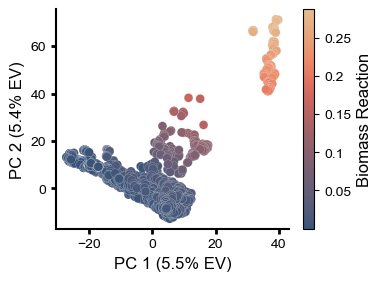

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colormaps as cmaps
import matplotlib

# Set font to Arial
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Load data
pca_df = pd.read_csv('suppfig2.csv')
explained_variance = pd.read_csv('suppfig2_explained_variance.csv').reset_index(drop=True)['0']

# Create scatter plot
fig, ax = plt.subplots(1,1,figsize=(3.76, 2.85))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='biomass_reaction', 
                palette=cmaps.lipari[50:220], s=40, legend=False, linewidth=0.1)

# Add axis labels
plt.xlabel(f'PC 1 ({100*round(explained_variance[0],3)}% EV)', fontsize=12)
plt.ylabel(f'PC 2 ({100*round(explained_variance[1],3)}% EV)', fontsize=12)

# Add colorbar
norm = plt.Normalize(pca_df['biomass_reaction'].min(), pca_df['biomass_reaction'].max())
sm = plt.cm.ScalarMappable(cmap=cmaps.lipari[50:220], norm=norm)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Biomass Reaction', fontsize=12)
cbar.set_ticklabels([f'{round(i, 2)}' for i in cbar.get_ticks()], fontsize=10)

# Style plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, labelsize=10)
ax.yaxis.set_tick_params(width=2, labelsize=10)
plt.show()